## HW11 -- Adv. SQL

### Step3 - Climate Analysis and Exploration
    # Create a Jupyter Notebook called climate_analysis.ipynb to complete climate analysis and 
      data exploration.
    # Choose a start date and end date for your trip.  Make sure that your vacation range is approximately
      3-15 days total.
    # Use SQLAlchemy create_engine to connect to your sqlite database.
    # Use SQLalchemy automap_base() to reflect your tables into classes and save a reference to those
      classes called Station and Measurement.

In [1]:
# I choose a vacation range of 15 days.  Start of vacation is whenever this gets checked, less 15 days.

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [4]:
col1 = inspector.get_columns("measurements")
for c in col1:
    print (c["name"], c["type"])

id INTEGER
station VARCHAR
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
col2 = inspector.get_columns("station")
for c in col2:
    print (c["name"], c["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
Base = automap_base()
Base.prepare(engine, reflect = True)
Measurements = Base.classes.measurements
Station = Base.classes.station
session = Session(engine)

### Precipitation Analysis
    # Design a query to retrieve the last 12 months of precipitation data.
    # Select only the date and prcp values.
    # Load the query results into a pandas DataFrame and set the index to the date column.
    # Plot the results.
    # Use pandas to print the summary statistics for the precipitation data.

In [7]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
date_delta = dt.date.today() - dt.timedelta(days = 365)
print (date_delta)

2017-04-24


In [9]:
part_3a = session.query(Measurements.date, func.sum(Measurements.prcp)).\
    filter(Measurements.date >= date_delta).\
    group_by(Measurements.date).all()

data_3a = []
names3a = ['Date', 'Precipitation']
for p in part_3a:
    (date, inches_per_date) = p
    data_3a.append(p)
    
part3a_df = pd.DataFrame(data_3a, columns=names3a)
part3a_df.head()

,Date,Precipitation
0,2017-04-24,0.06
1,2017-04-25,0.00
2,2017-04-26,0.39
3,2017-04-27,0.42
4,2017-04-28,4.24


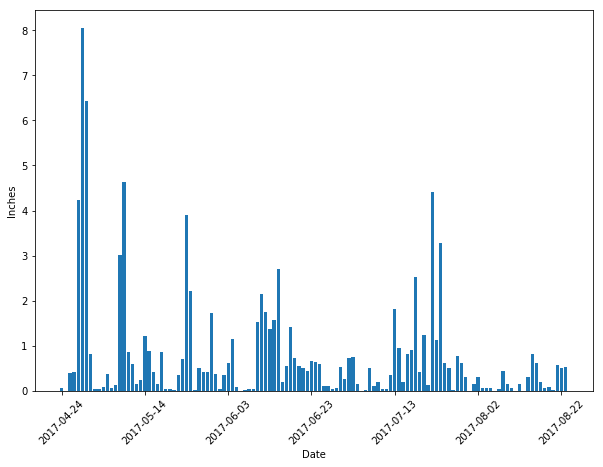

In [36]:
list_stuff = ["", part3a_df["Date"][0], part3a_df["Date"][20], part3a_df["Date"][40], part3a_df["Date"][60], \
              part3a_df["Date"][80], part3a_df["Date"][100], part3a_df["Date"][120]]
plt.figure(figsize = (10, 7))
ax = plt.subplot()
ax.bar(range(len(part3a_df["Date"])), part3a_df["Precipitation"], label = "Precipitation")
ax.set_xticklabels(list_stuff, rotation = 45)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

### Station Analysis
    # Design a query to calculate the total number of stations.
    # Design a query to find the most active stations.
        # List the stations and observation counts in descending order.
        # Which station has the highest number of observations?
    # Design a query to retrieve the last 12 months of temperature observation data (tobs).
        # Filter by the station with the highest number of observations.
        # Plot the results as a histogram with bins = 12.

In [11]:
# Total number of stations.
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
# Find the most active stations--list in descending order.
session.query(Measurements.station, func.count(Measurements.prcp)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.prcp).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [13]:
# Find the most active station.
session.query(Measurements.station, func.count(Measurements.prcp)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.prcp).desc()).first()

('USC00519281', 2772)

In [14]:
# Find the last 12 months of temperature observation data (tobs).  Filter by station with the highest number
# of observations.
part_3b = session.query(Measurements.date, func.avg(Measurements.tobs)).\
    filter(Measurements.date >= date_delta).\
    filter(Measurements.station == "USC00519281").\
    group_by(Measurements.date).all()

data_3b = []
names3b = ["Date", "Average Temperature"]
for p in part_3b:
    (date, avg_temp) = p
    data_3b.append(p)
    
part3b_df = pd.DataFrame(data_3b, columns=names3b)
part3b_df.head()

,Date,Average Temperature
0,2017-04-24,68.0
1,2017-04-25,72.0
2,2017-04-26,74.0
3,2017-04-27,70.0
4,2017-04-28,67.0


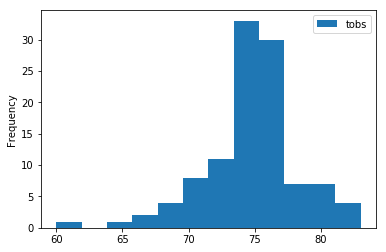

In [15]:
plt.hist(part3b_df["Average Temperature"], bins = 12, label = "tobs")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Temperature Analysis
    # Write a function called calc_temps that will accept a start date and end date in the format %y-%m-%d
      and return the minimum, average, and maximum temperatures for that range of dates.
    # Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the
      matching dates from the previous year (ie: use "2017-01-01" if your trip start date was (2018-01-01")
    # Plot the min, avg, and max temperature from your previous query as a bar chart.
        # Use the average temperature as the bar height.
        # Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
       

In [16]:
trip_end = dt.date.today() - dt.timedelta(days = 365)
trip_start = (dt.date.today() - dt.timedelta(days = 15)) - dt.timedelta(days = 365)

sel = [func.min(Measurements.tobs),
      func.avg(Measurements.tobs),
      func.max(Measurements.tobs)]

part_3c = session.query(* sel).\
    filter(Measurements.date >= trip_start).\
    filter(Measurements.date <= trip_end).\
    all()

data_3c = []
names3c = ['Min', 'Avg', 'Max']
for p in part_3c:
    (min, avg, max) = p
    data_3c.append(p)
    
part3c_df = pd.DataFrame(data_3c, columns=names3c)
part3c_df.head(100)

,Min,Avg,Max
0,67.0,73.344828,83.0


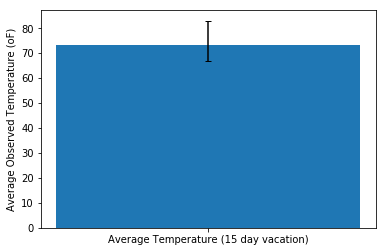

In [17]:
# This is looking at the average temperature over a fifteen day span at each station.
ax = plt.subplot()
min_yerr = part3c_df["Avg"] - part3c_df["Min"]
max_yerr = part3c_df["Max"] - part3c_df["Avg"]
ax.bar(range(1), part3c_df["Avg"], yerr = [min_yerr, max_yerr], capsize = 3)
ax.set_xticks(range(1))
ax.set_xticklabels(["Average Temperature (15 day vacation)"])
plt.ylabel("Average Observed Temperature (oF)")
plt.show()

### Optional Recommended Analysis
    # The following are optional challenge queries.  These are highly recommended to attempt, but not
      required for the homework.
          # Calculate the rainfall per weather station using the previous year's matching dates.
          # Calculate the daily normals.  Normals are the averages for min, avg, and max temperatures.
              # Create a function called daily_normals that will calculate the daily normals for a 
                specific date.  This date string will be in the format %m-%d.  Be sure to use all 
                historic tobs that match that date string.
              # Create a list of dates for your trip in the format %m-%d.  Use the daily_normals
                function to calculate the normals for each date string and append the results to a list.
              # Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
              # Use Pandas to plot an area plot (stacked = False) for the daily normals.

In [18]:
# Calculate rainfall per weather station using the previous year's matching dates.
session.query(Measurements.station, func.sum(Measurements.prcp)).\
    filter(Measurements.date >= trip_start).\
    filter(Measurements.date <= trip_end).\
    group_by(Measurements.station).all()
    

[('USC00513117', 4.999999999999999),
 ('USC00514830', 2.6100000000000003),
 ('USC00516128', 10.97),
 ('USC00517948', 0.0),
 ('USC00519281', 10.419999999999998),
 ('USC00519397', 0.9400000000000002),
 ('USC00519523', 3.5199999999999996)]

In [19]:
session.query(Measurements.date, func.min(Measurements.tobs)).\
        filter(func.strftime("%m", Measurements.date) == "04").\
        filter(func.strftime("%d", Measurements.date) == "22").\
        group_by(Measurements.date).all()

[('2010-04-22', 69.0),
 ('2011-04-22', 73.0),
 ('2012-04-22', 65.0),
 ('2013-04-22', 69.0),
 ('2014-04-22', 71.0),
 ('2015-04-22', 66.0),
 ('2016-04-22', 69.0),
 ('2017-04-22', 72.0)]

In [20]:
# Find average mins during vacation.
data = []
foo = int(dt.date.today().strftime("%d"))
ffo = dt.date.today().strftime("%m")

for c in range(16):
    if foo-c >= 10:
        mins = session.query(func.min(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == f"{foo-c}").\
            group_by(Measurements.date).all()
        data.append(mins)
    elif foo-c < 10:
        moo = f"0{foo-c}"
        mins = session.query(func.min(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == moo).\
            group_by(Measurements.date).all()
        data.append(mins)
        
print (data)

[[(69.0,), (71.0,), (68.0,), (67.0,), (69.0,), (69.0,), (69.0,), (68.0,)], [(66.0,), (71.0,), (65.0,), (70.0,), (69.0,), (67.0,), (68.0,), (70.0,)], [(69.0,), (73.0,), (65.0,), (69.0,), (71.0,), (66.0,), (69.0,), (72.0,)], [(69.0,), (66.0,), (70.0,), (69.0,), (68.0,), (72.0,), (68.0,), (69.0,)], [(69.0,), (66.0,), (64.0,), (68.0,), (69.0,), (72.0,), (69.0,), (69.0,)], [(70.0,), (66.0,), (69.0,), (65.0,), (72.0,), (68.0,), (67.0,), (67.0,)], [(68.0,), (67.0,), (69.0,), (69.0,), (70.0,), (72.0,), (68.0,), (68.0,)], [(65.0,), (73.0,), (71.0,), (65.0,), (69.0,), (70.0,), (66.0,), (67.0,)], [(64.0,), (70.0,), (71.0,), (63.0,), (70.0,), (70.0,), (72.0,), (69.0,)], [(61.0,), (67.0,), (68.0,), (68.0,), (68.0,), (68.0,), (70.0,), (70.0,)], [(65.0,), (70.0,), (68.0,), (70.0,), (68.0,), (69.0,), (71.0,), (70.0,)], [(68.0,), (64.0,), (64.0,), (70.0,), (67.0,), (69.0,), (71.0,), (69.0,)], [(65.0,), (72.0,), (68.0,), (71.0,), (65.0,), (69.0,), (70.0,), (69.0,)], [(68.0,), (70.0,), (65.0,), (66.0,), 

In [21]:
average_min = []
for x in data:
    f = np.mean(x)
    average_min.append(f)
print (average_min)

[68.75, 68.25, 69.25, 68.875, 68.25, 68.0, 68.875, 68.25, 68.625, 67.5, 68.875, 67.75, 68.625, 67.875, 66.5, 67.375]


In [22]:
# Find average maxs during vacation.
data1 = []

for c in range(16):
    if foo-c >= 10:
        maxs = session.query(func.max(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == f"{foo-c}").\
            group_by(Measurements.date).all()
        data1.append(maxs)
    elif foo-c < 10:
        moo = f"0{foo-c}"
        maxs = session.query(func.max(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == moo).\
            group_by(Measurements.date).all()
        data1.append(maxs)
        
average_max = []
for x in data1:
    f = np.mean(x)
    average_max.append(f)
print (average_max)

[76.75, 76.625, 76.125, 75.25, 76.125, 76.0, 75.0, 74.75, 75.75, 75.875, 76.375, 75.25, 75.5, 76.75, 75.125, 75.375]


In [23]:
# Find the average of averages during vacation.
data2 = []

for c in range(16):
    if foo-c >= 10:
        aves = session.query(func.avg(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == f"{foo-c}").\
            group_by(Measurements.date).\
            all()
        data2.append(aves)
    elif foo-c < 10:
        moo = f"0{foo-c}"
        aves = session.query(func.avg(Measurements.tobs)).\
            filter(func.strftime("%m", Measurements.date) == ffo).\
            filter(func.strftime("%d", Measurements.date) == moo).\
            group_by(Measurements.date).\
            all()
        data2.append(aves)

average_ave = []
for x in data2:
    f = np.mean(x)
    average_ave.append(f)
print (average_ave)

[73.143601190476204, 73.148809523809518, 72.600595238095238, 72.372420634920644, 72.553869047619045, 72.238392857142856, 72.466369047619054, 71.752827380952368, 71.772767857142853, 72.013888888888886, 72.788690476190482, 71.833829365079367, 72.258432539682545, 72.482440476190476, 71.479910714285722, 71.738095238095241]


In [24]:
dates = [(date_delta - dt.timedelta(days = x)).strftime("%m-%d") for x in range(16)]
print (dates)

['04-24', '04-23', '04-22', '04-21', '04-20', '04-19', '04-18', '04-17', '04-16', '04-15', '04-14', '04-13', '04-12', '04-11', '04-10', '04-09']


In [25]:
df = pd.DataFrame({
    "Dates": dates,
    "Minimums": average_min,
    "Maximums": average_max,
    "Averages": average_ave
})

df.head(16)

,Averages,Dates,Maximums,Minimums
0,73.143601,04-24,76.750,68.750
1,73.148810,04-23,76.625,68.250
2,72.600595,04-22,76.125,69.250
3,72.372421,04-21,75.250,68.875
4,72.553869,04-20,76.125,68.250
5,72.238393,04-19,76.000,68.000
6,72.466369,04-18,75.000,68.875
7,71.752827,04-17,74.750,68.250
8,71.772768,04-16,75.750,68.625
9,72.013889,04-15,75.875,67.500


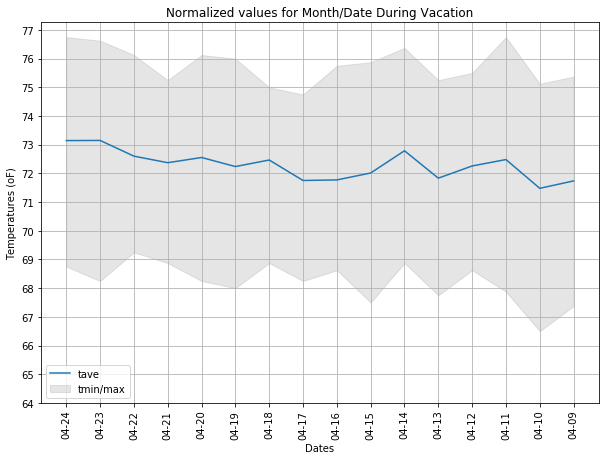

In [26]:
plt.figure(figsize = (10, 7))
ax = plt.subplot()
ax.fill_between(range(len(df["Dates"])), df["Minimums"], df["Maximums"], alpha = 0.2, color = "grey", label = "tmin/max")
ax.plot(range(len(df["Dates"])), df["Averages"], label = "tave")
ax.set_yticks(range(64, 78))
ax.set_xticks(range(len(df["Dates"])))
ax.set_xticklabels(df["Dates"], rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Temperatures (oF)")
plt.legend(loc = "lower left")
plt.grid()
plt.title("Normalized values for Month/Date During Vacation")
plt.show()